<a href="https://colab.research.google.com/github/Abhiram-k1/Elevvo-ML-internship/blob/main/Elevvo_level_1_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

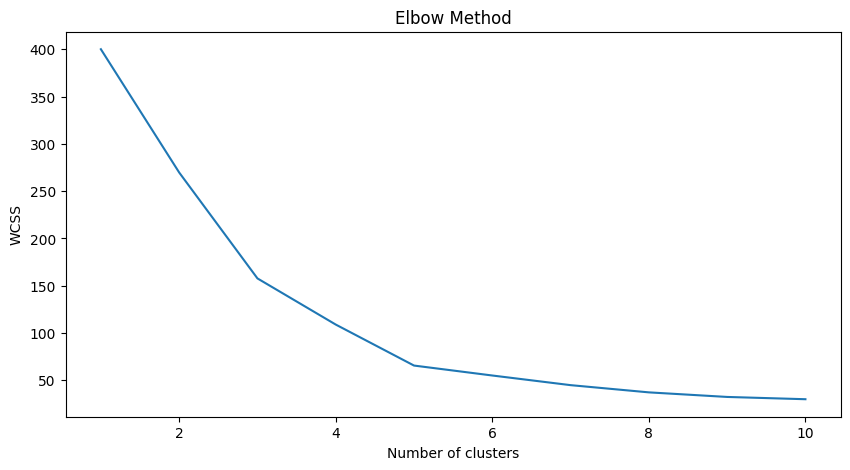

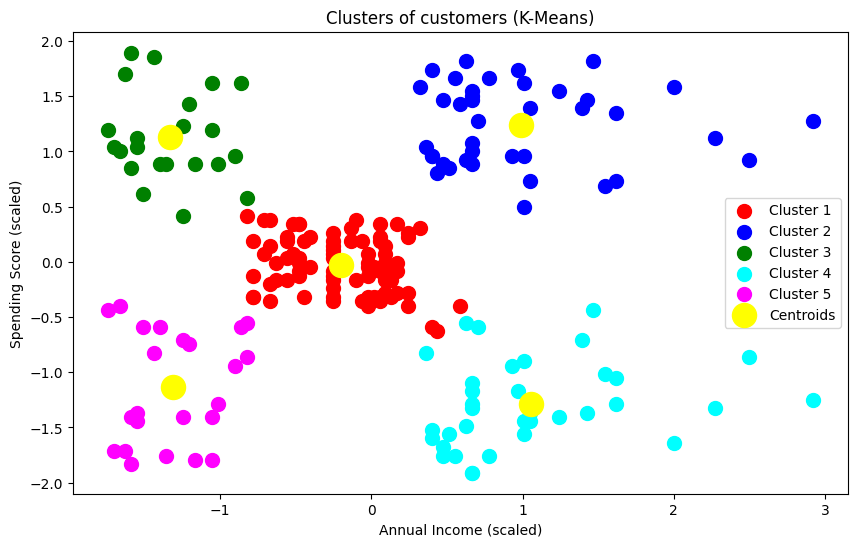

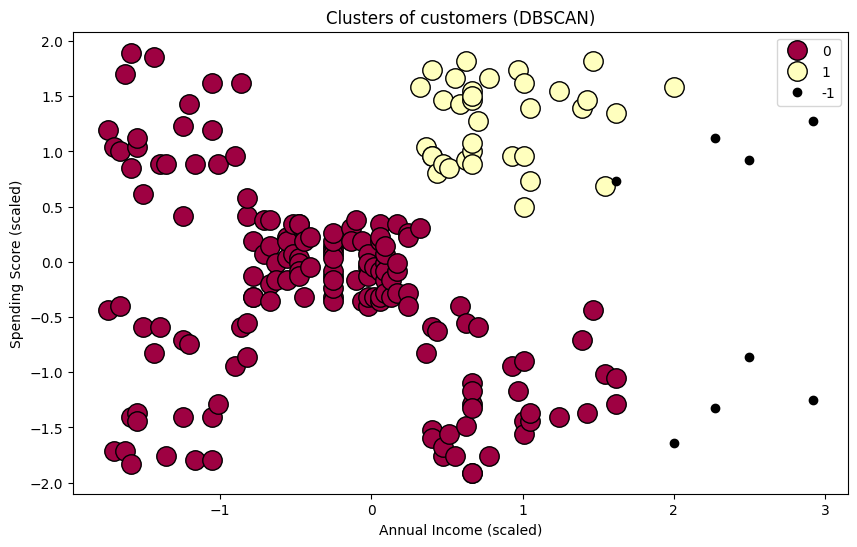

Average spending score per K-Means cluster:
   KMeans_Cluster  Spending Score (1-100)
0               0               49.518519
1               1               82.128205
2               2               79.363636
3               3               17.114286
4               4               20.913043


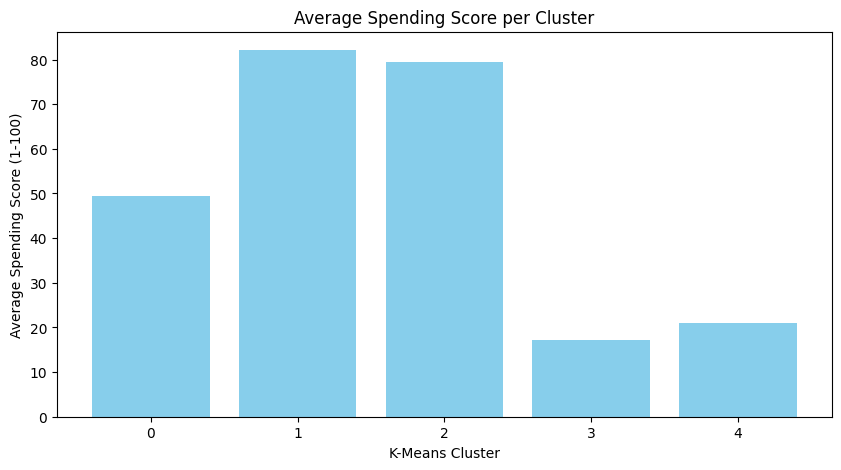

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# --- Data Selection and Scaling ---
# Selecting the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Means Clustering ---
# --- Determine optimal number of clusters using the Elbow Method ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()

# Applying K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['KMeans_Cluster'] = y_kmeans

# --- Visualize K-Means Clusters ---
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers (K-Means)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.savefig('kmeans_clusters.png')
plt.show()


# --- DBSCAN Clustering (Bonus) ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = y_dbscan

# --- Visualize DBSCAN Clusters ---
plt.figure(figsize=(10, 6))
# Plotting the points for each cluster
unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (y_dbscan == k)

    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14 if k != -1 else 6)

plt.title('Clusters of customers (DBSCAN)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(unique_labels)
plt.savefig('dbscan_clusters.png')
plt.show()


# --- Analyze Average Spending per Cluster (Bonus) ---
average_spending_per_cluster = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean().reset_index()
print("Average spending score per K-Means cluster:")
print(average_spending_per_cluster)

# Create a bar chart for average spending per cluster
plt.figure(figsize=(10, 5))
plt.bar(average_spending_per_cluster['KMeans_Cluster'], average_spending_per_cluster['Spending Score (1-100)'], color='skyblue')
plt.xlabel('K-Means Cluster')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score per Cluster')
plt.xticks(average_spending_per_cluster['KMeans_Cluster'])
plt.savefig('average_spending_per_cluster.png')
plt.show()